<a href="https://colab.research.google.com/github/VoMinhKhoii/hcmut-project-cuoi-khoa/blob/quocviet/EDA_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/MLDL/Final_Project/twitter_training.csv')
csv_path = '/content/drive/MyDrive/MLDL/Final_Project/twitter_training.csv'

Mounted at /content/drive


In [ ]:
import nltk
import string
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('pos_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading pos_tagger: Package 'pos_tagger' not found
[nltk_data]     in index
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


#Thêm header cho file

In [ ]:
'''
# Gán tên cột mới
header = "ID,Main context,Output,Comment\n"

# Đọc toàn bộ nội dung cũ
with open(csv_path, "r", encoding="utf-8") as f:
    content = f.read()

# Ghi lại: header + dữ liệu cũ
with open(csv_path, "w", encoding="utf-8") as f:
    f.write(header + content)

# Load the dataframe after adding headers
df = pd.read_csv(csv_path)
'''
df.head()

,ID,Main context,Output,Comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


#Basic NLTK

In [ ]:
# Initialize PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum(): # digital character
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
example = df['Comment'][50]
example
tokens = nltk.word_tokenize(example)
tokens[:10]

['Guilty', 'of', 'sobriety', '!', 'A', 'bit', 'of', 'a', 'borderline', '.']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Guilty', 'NN'),
 ('of', 'IN'),
 ('sobriety', 'NN'),
 ('!', '.'),
 ('A', 'DT'),
 ('bit', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('borderline', 'NN'),
 ('.', '.')]

In [ ]:
etitites = nltk.chunk.ne_chunk(tagged)
etitites.pprint()

(S
  (GPE Guilty/NN)
  of/IN
  sobriety/NN
  !/.
  A/DT
  bit/NN
  of/IN
  a/DT
  borderline/NN
  ./.
  I/PRP
  was/VBD
  called/VBN
  to/TO
  work/VB
  early/JJ
  tomorrow/NN
  ,/,
  so/IN
  I/PRP
  ca/MD
  n't/RB
  catch/VB
  up/RP
  ./.)


### Sentiment Distribution
Let's check the distribution of the different sentiments in the dataset.

[Text(0, 0, '20832'),
 Text(0, 0, '18318'),
 Text(0, 0, '22542'),
 Text(0, 0, '12990')]

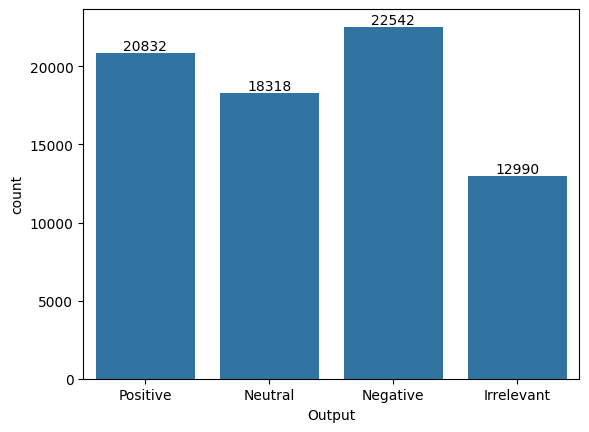

In [ ]:
'''
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'Output', data = df)
# Hiển thị số trên đầu mỗi cột
for p in ax.patches:
  ax.text(
      p.get_x() + p.get_width() / 2,
      p.get_height(),
      int(p.get_height()),
      ha = 'center', va = 'bottom', fontsize = 12
  )

plt.title('Sentiment Distributions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
'''
ax = sns.countplot(x='Output', data=df)
ax.bar_label(ax.containers[0])

### Text Length Analysis
Let's analyze the length of the comments.

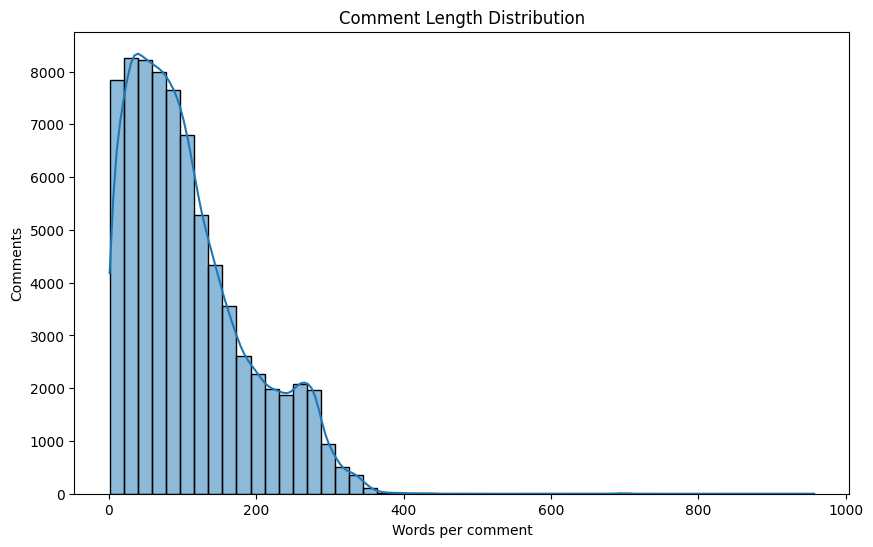

In [ ]:
df['Comment Length'] = df['Comment'].apply(lambda x : len(str(x)))

plt.figure(figsize = (10,6))
sns.histplot(df['Comment Length'], bins = 50, kde = 'True')
plt.title('Comment Length Distribution')
plt.xlabel('Words per comment')
plt.ylabel('Comments')
plt.show()

### Word Cloud of Comments

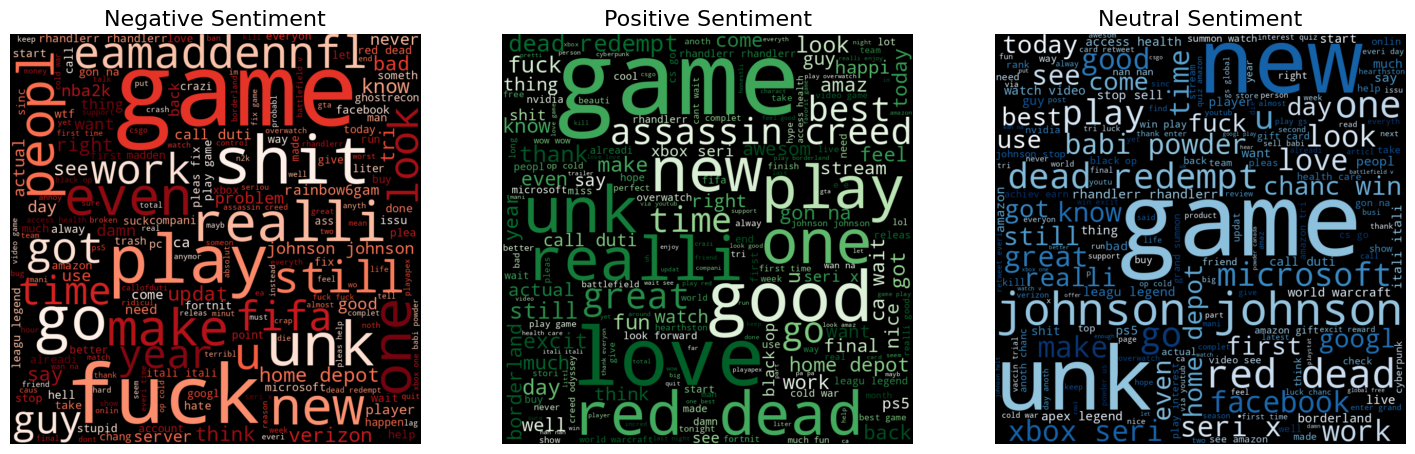

In [ ]:

# Applying the transformation function to the 'Comment' column
# Ensure to handle potential non-string values by converting to string first
df['transformed_comment'] = df['Comment'].astype(str).apply(transform_text)
'''
all_words = " ".join([comment for comment in df['transformed_comment']])

wordcloud = WordCloud(width = 1000, height = 1000, max_font_size= 200, background_color = 'black').generate(all_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
'''

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Giả sử cột Output chứa nhãn sentiment: negative, positive, neutral

# 1. Lọc dữ liệu theo sentiment
neg_text = " ".join(df[df['Output'] == 'Negative']['transformed_comment'])
pos_text = " ".join(df[df['Output'] == 'Positive']['transformed_comment'])
neu_text = " ".join(df[df['Output'] == 'Neutral']['transformed_comment'])

# 2. Tạo WordCloud cho từng loại
wordcloud_neg = WordCloud(width=800, height=800, max_font_size=200,
                          background_color='black', colormap='Reds').generate(neg_text)

wordcloud_pos = WordCloud(width=800, height=800, max_font_size=200,
                          background_color='black', colormap='Greens').generate(pos_text)

wordcloud_neu = WordCloud(width=800, height=800, max_font_size=200,
                          background_color='black', colormap='Blues').generate(neu_text)

# 3. Vẽ ra cùng lúc
plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Sentiment", fontsize=16)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Positive Sentiment", fontsize=16)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title("Neutral Sentiment", fontsize=16)
plt.axis('off')

plt.show()

### Most Common Words
Let's look at the most common words in the transformed comments.

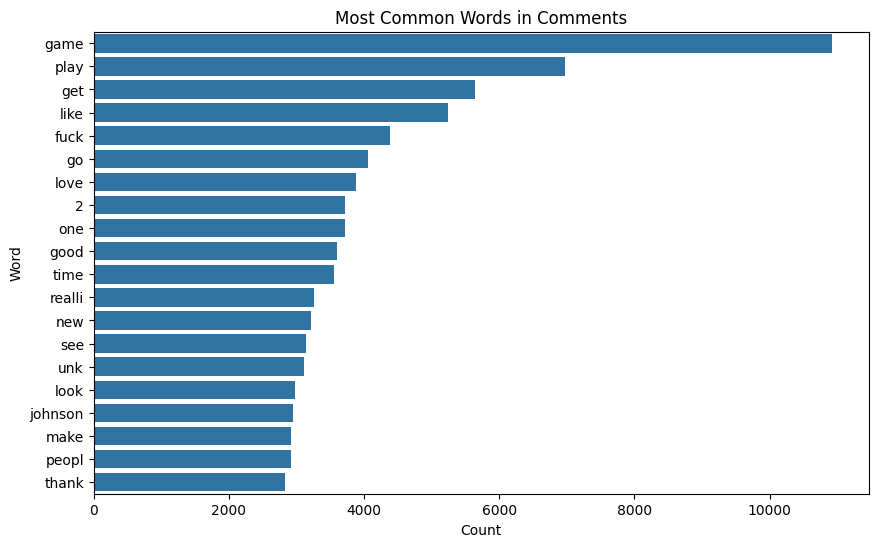

In [ ]:
all_words = " ".join([comment for comment in df['transformed_comment']])

all_words_list = all_words.split()
common_words = Counter(all_words_list).most_common(20)

common_words_df = pd.DataFrame(common_words, columns = ['Word', 'Count'])

plt.figure(figsize = (10,6))
sns.barplot(x = 'Count', y = 'Word', data = common_words_df)
plt.title('Most Common Words in Comments')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()